<a href="https://colab.research.google.com/github/lauraredmondson/nma-eggplant-cobra/blob/master/Comparison_NN_fMRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import urllib
from scipy.stats import *

In [ ]:
corr_fMRI, _ = urllib.request.urlretrieve('https://github.com/lauraredmondson/nma-eggplant-cobra/raw/master/Results/Corr_fMRI.npy')
corr_CNN,  _ = urllib.request.urlretrieve('https://github.com/lauraredmondson/nma-eggplant-cobra/raw/master/Results/21_train_coefs.npy')

#corr_fMRI_dig, _ = urllib.request.urlretrieve('https://github.com/lauraredmondson/nma-eggplant-cobra/raw/master/Results/Dig_Corr_fMRI.npy')
#corr_CNN_dig,  _ = urllib.request.urlretrieve('https://github.com/lauraredmondson/nma-eggplant-cobra/raw/master/')

In [ ]:
corr_fmri = np.load(corr_fMRI) 
corr_cnn = np.load(corr_CNN)

#corr_fmri = corr_fmri[~np.eye(1750).astype(bool)]
#corr_cnn = corr_cnn[~np.eye(1750).astype(bool)]

corr_fmri_flatten = np.reshape(corr_fmri,-1)
corr_cnn_flatten = np.reshape(corr_cnn,-1)

In [ ]:
print(corr_fmri_flatten.shape)

(3062500,)


In [ ]:
spear = spearmanr(corr_fmri_flatten, corr_cnn_flatten)

In [ ]:
print(spear)

SpearmanrResult(correlation=0.03713078974108594, pvalue=0.0)


In [ ]:
def upper_tri_indexing(A): 
  m = A.shape[0] 
  r,c = np.triu_indices(m,1) 
  return A[r,c] 

In [ ]:
corr_fmri_new = upper_tri_indexing(corr_fmri)
corr_cnn_new = upper_tri_indexing(corr_cnn)
print(corr_fmri_new.shape)

(1530375,)


In [ ]:
spear_new = spearmanr(corr_fmri_new, corr_cnn_new)
print(spear_new)

SpearmanrResult(correlation=0.03547826875396466, pvalue=0.0)


In [ ]:
from scipy.io import loadmat
temp_test, _ = urllib.request.urlretrieve('https://github.com/lauraredmondson/nma-eggplant-cobra/raw/master/Data/y_test.mat')
temp_train,  _ = urllib.request.urlretrieve('https://github.com/lauraredmondson/nma-eggplant-cobra/raw/master/Data/y_train.mat')
y_test_ours = loadmat(temp_test)
y_train_ours = loadmat(temp_train)
labels = ['Animals', 'Buildings', 'Food', 'Humans', 'Indoor Scenes', 'Manmade Objects', 'Outdoor Scenes', 'Textures']

In [ ]:
start = 0
end = np.sum(y_train_ours["y_train"]==1)-1
spear_corr = np.zeros((8,1))
for i in range(1,9): 
  fmri = corr_fmri[start:end, start:end]
  cnn = corr_fmri[start:end, start:end]
  fmri_new = upper_tri_indexing(fmri)
  cnn_new = upper_tri_indexing(cnn)
  spear = spearmanr(fmri_new, cnn_new)
  spear_corr[i-1] = spear[0]
  #print('Start: ', start, 'End: ', end)
  #print('%s: ' % labels[i-1], spear)
  start = end +1
  end = end + np.sum(y_train_ours["y_train"]==i+1)
print(spear_corr)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
################## DO NOT CONSIDER WITH i=j --> same labels BECAUSE THERE IS THE DIAGONAL
start_rows = 0
end_rows = np.sum(y_train_ours["y_train"]==1)-1
start_colums = 0
end_colums = np.sum(y_train_ours["y_train"]==1)-1
spear_all = np.zeros((8,8))
for i in range(1,9): 
  print(i)
  for j in range(i,9):
    fmri = corr_fmri[start_rows:end_rows, start_colums:end_colums]
    cnn = corr_cnn[start_rows:end_rows, start_colums:end_colums]
    print('Start_row: ', start_rows, 'End_row: ', end_rows)
    print('Start_colums: ', start_colums, 'End_colums: ', end_colums)
    fmri_new = np.reshape(fmri,-1) # not using upper_tri_indexing() because we have not always squared matrix
    cnn_new = np.reshape(cnn,-1)
    spear = spearmanr(fmri_new, cnn_new)
    spear_all[i-1, j-1] = spear[0]
    if i==j:
      spear_all[i-1, j-1] = spear_corr[i-1]
    #print('%s ' % labels[i-1], '%s: ' % labels[j-1], spear)
    start_colums = end_colums +1
    end_colums = end_colums + np.sum(y_train_ours["y_train"]==j+1)
  start_rows = end_rows +1
  end_rows = end_rows + np.sum(y_train_ours["y_train"]==i+1)
  start_colums = start_rows
  end_colums = end_rows
print(spear_all)

1
Start_row:  0 End_row:  488
Start_colums:  0 End_colums:  488
Start_row:  0 End_row:  488
Start_colums:  489 End_colums:  647
Start_row:  0 End_row:  488
Start_colums:  648 End_colums:  763
Start_row:  0 End_row:  488
Start_colums:  764 End_colums:  996
Start_row:  0 End_row:  488
Start_colums:  997 End_colums:  1096
Start_row:  0 End_row:  488
Start_colums:  1097 End_colums:  1190
Start_row:  0 End_row:  488
Start_colums:  1191 End_colums:  1544
Start_row:  0 End_row:  488
Start_colums:  1545 End_colums:  1749
2
Start_row:  489 End_row:  647
Start_colums:  489 End_colums:  647
Start_row:  489 End_row:  647
Start_colums:  648 End_colums:  763
Start_row:  489 End_row:  647
Start_colums:  764 End_colums:  996
Start_row:  489 End_row:  647
Start_colums:  997 End_colums:  1096
Start_row:  489 End_row:  647
Start_colums:  1097 End_colums:  1190
Start_row:  489 End_row:  647
Start_colums:  1191 End_colums:  1544
Start_row:  489 End_row:  647
Start_colums:  1545 End_colums:  1749
3
Start_ro

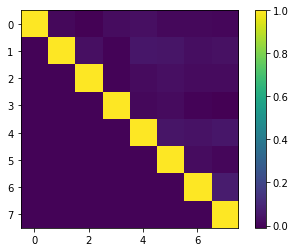

In [ ]:
plt.imshow(spear_all)
plt.colorbar()

Text(0.5, 1.0, 'InterClass Correlation Score')

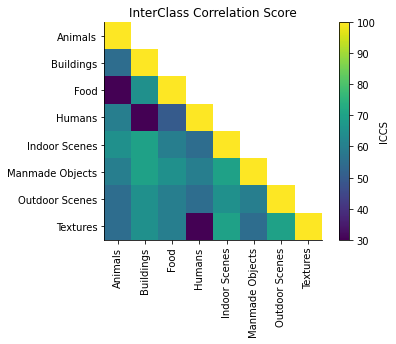

In [ ]:
def digitize_rdm(rdm_raw, n_bins = 10): 
    """Digitize an input matrix to n bins (10 bins by default)
    rdm_raw: a square matrix 
    """
    # compute the bins 
    
    rdm_bins = [np.percentile(np.ravel(rdm_raw), 100/n_bins * i) for i in range(n_bins)]
    # Compute the vectorized digitized value 
    rdm_vec_digitized = np.digitize(np.ravel(rdm_raw), bins = rdm_bins) * (100 // n_bins) 
    
    # Reshape to matrix
    rdm_digitized = np.reshape(rdm_vec_digitized, np.shape(rdm_raw)) 
    
    # Force symmetry in the plot
    rdm_digitized = (rdm_digitized + rdm_digitized.T) / 2
    
    return rdm_digitized
spe_bin = digitize_rdm(spear_all)
spe_low = np.tril(digitize_rdm(spear_all))
spe_low[spe_low==0] = 'Nan'
labels_ax = ['Animals', 'Buildings', 'Food', 'Humans', 'Indoor Scenes', 'Manmade Objects', 'Outdoor Scenes', 'Textures']
binsize = np.histogram([1,2,3,4,5,6,7,8], 8)[0]
edges = np.concatenate([np.asarray([0]), np.cumsum(binsize)])[:-1]
f, ax = plt.subplots(1,1)
plt.imshow(spe_low)
cbar = plt.colorbar()
cbar.set_label('ICCS') 
#plt.axis('off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 
ax.set_xticks(list(np.array(edges)))
ax.set_xticklabels(labels_ax, rotation = 90)
ax.set_yticks(list(np.array(edges)))
ax.set_yticklabels(labels_ax)
ax.set_title('InterClass Correlation Score')